In [259]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 1. Extraction, Transformation, Load (ETL)

### 1.1 Abrir dataset Kaggle

In [260]:
df_kaggle = pd.read_csv('kaggle_income_original.csv', encoding='latin1')

In [261]:
df_kaggle.columns

Index(['id', 'State_Code', 'State_Name', 'State_ab', 'County', 'City', 'Place',
       'Type', 'Primary', 'Zip_Code', 'Area_Code', 'ALand', 'AWater', 'Lat',
       'Lon', 'Mean', 'Median', 'Stdev', 'sum_w'],
      dtype='object')

In [262]:
# Tamaño del DataFrame
num_filas, num_columnas = df_kaggle.shape

print(f'Número de filas: {num_filas}')
print(f'Número de columnas: {num_columnas}')

Número de filas: 32526
Número de columnas: 19


### 1.2 Se visualiza la información cuantitativa del dataset disponible:

In [263]:
df_kaggle.describe()

,id,State_Code,Zip_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,sum_w
count,3.252600e+04,32526.000000,32526.000000,3.252600e+04,3.252600e+04,32526.000000,32526.000000,32526.000000,32526.000000,32526.000000,32526.000000
mean,6.203707e+07,28.624885,50182.648404,1.165893e+08,6.952054e+06,37.731983,-91.303844,66703.986042,85452.938818,47273.695321,576.910273
std,1.115546e+08,16.297205,29410.122808,1.280894e+09,2.092093e+08,5.579450,16.227588,30451.194599,87810.895132,16555.486882,3911.006939
min,1.026000e+03,1.000000,601.000000,0.000000e+00,0.000000e+00,17.929085,-175.860041,0.000000,0.000000,0.000000,0.000000
25%,8.021282e+06,13.000000,26362.000000,1.906991e+06,0.000000e+00,34.013469,-97.664034,46015.500000,36046.250000,36075.000000,201.436458
50%,2.901168e+07,29.000000,48163.000000,5.022976e+06,2.703350e+04,38.925588,-87.139280,60738.000000,51874.500000,46179.000000,329.482618
75%,4.802899e+07,42.000000,76712.000000,3.090984e+07,5.082078e+05,41.495793,-79.852969,82223.500000,80915.000000,58078.000000,590.227670
max,4.802211e+08,72.000000,99950.000000,9.163267e+10,2.453228e+10,71.253500,-65.500823,242857.000000,300000.000000,113936.000000,612241.922964


### 1.3 Se valida la información faltante y se calcula su representación porcentual respecto al dataset original.

In [264]:
# Crear un DataFrame que contenga información sobre datos faltantes
data_faltante = pd.DataFrame({
    'Columna': df_kaggle.columns,  # Nombres de las columnas del DataFrame original
    'Datos Faltantes': df_kaggle.isnull().sum(),  # Cantidad de datos faltantes por columna
    'Porcentaje de Datos Faltantes': (df_kaggle.isnull().mean() * 100).round(2)  # Porcentaje de datos faltantes por columna
})

# Ordenar el DataFrame por el porcentaje de datos faltantes de mayor a menor
data_faltante = data_faltante.sort_values(by='Porcentaje de Datos Faltantes', ascending=False)

# Mostrar el DataFrame resultante
print(data_faltante)

               Columna  Datos Faltantes  Porcentaje de Datos Faltantes
id                  id                0                            0.0
Area_Code    Area_Code                0                            0.0
Stdev            Stdev                0                            0.0
Median          Median                0                            0.0
Mean              Mean                0                            0.0
Lon                Lon                0                            0.0
Lat                Lat                0                            0.0
AWater          AWater                0                            0.0
ALand            ALand                0                            0.0
Zip_Code      Zip_Code                0                            0.0
State_Code  State_Code                0                            0.0
Primary        Primary                0                            0.0
Type              Type                0                            0.0
Place 

In [265]:
# Obtener los tipos de datos de cada columna en el DataFrame
data_types = df_kaggle.dtypes

# Crear un nuevo DataFrame que muestre las columnas y sus tipos de datos
data_types_df = pd.DataFrame(data_types, columns=['Tipo de Dato'])

# Imprimir el DataFrame con los tipos de datos
print(data_types_df)

           Tipo de Dato
id                int64
State_Code        int64
State_Name       object
State_ab         object
County           object
City             object
Place            object
Type             object
Primary          object
Zip_Code          int64
Area_Code        object
ALand             int64
AWater            int64
Lat             float64
Lon             float64
Mean              int64
Median            int64
Stdev             int64
sum_w           float64


### 1.4 Como no se encontraron valores faltantes o nulos, se procede a verificar outliers en columnas de interés, como 'sum_w' y 'mean'.

Cantidad de outliers en la columna 'Mean': 461
Cantidad de outliers en la columna 'Median': 4469
Cantidad de outliers en la columna 'Stdev': 7
Cantidad de outliers en la columna 'sum_w': 1680


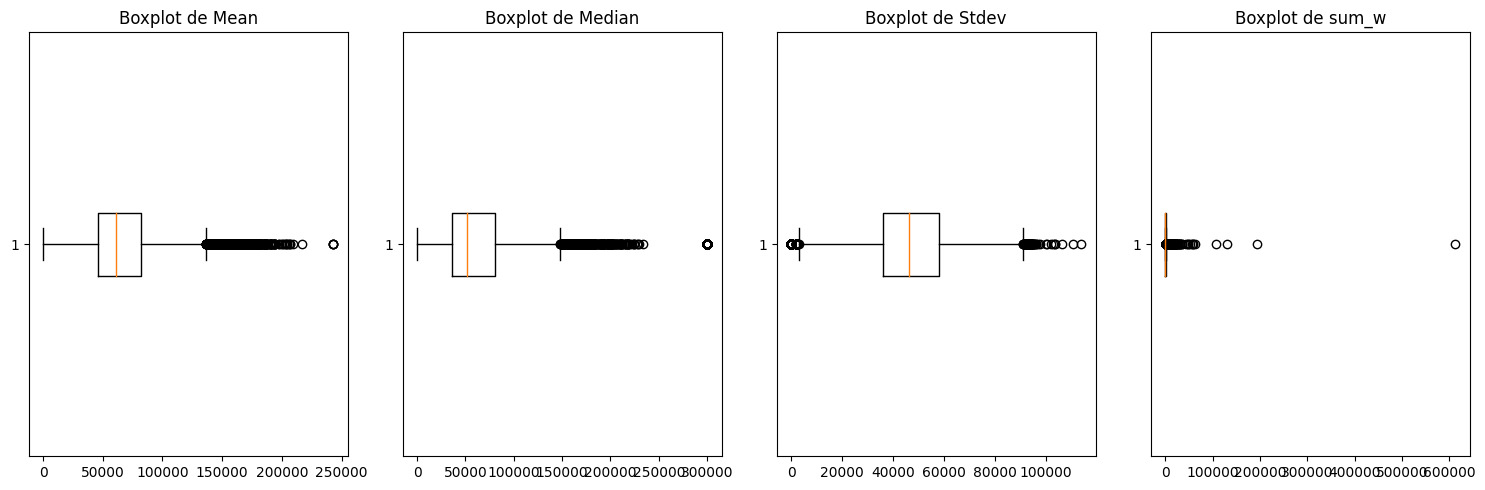

In [266]:
# Define las columnas que deseas analizar
columnas = ["Mean", "Median", 'Stdev', "sum_w"]

# Configura subgráficos para mostrar los boxplots
fig, axes = plt.subplots(1, len(columnas), figsize=(15, 5))

# Listas para almacenar los umbrales recomendados
umbrales_recomendados = []

for i, columna in enumerate(columnas):
    # Boxplot
    ax = axes[i]
    ax.boxplot(df_kaggle[columna], vert=False)
    ax.set_title(f'Boxplot de {columna}')

    # Cálculo del IQR y umbral recomendado
    Q1 = df_kaggle[columna].quantile(0.25)
    Q3 = df_kaggle[columna].quantile(0.75)
    IQR = Q3 - Q1

    umbral_recomendado = 2 * IQR
    umbrales_recomendados.append((columna, umbral_recomendado))

    # Identificación de outliers
    outliers = (df_kaggle[columna] < (Q1 - umbral_recomendado)) | (df_kaggle[columna] > (Q3 + umbral_recomendado))
    cantidad_outliers = outliers.sum()
    print(f"Cantidad de outliers en la columna '{columna}': {cantidad_outliers}")

plt.tight_layout()
plt.show()

Según la información previamente mencionada, es evidente que las columnas en cuestión muestran valores atípicos en un 4.32%, 14.16%, y 7.84%, respectivamente. Por lo tanto, se optó por llevar a cabo la imputación de estos valores. Para hacerlo, se reemplazaron los outliers por la mediana de cada columna. Esta elección se basa en el hecho de que la mediana es una medida de tendencia central robusta y se considera una opción sólida en esta situación.

- Se procede a imputar los outliers de la columna 'Mean'

In [267]:
# Calcular los límites de los outliers en la columna 'Mean'
Q1 = df_kaggle['Mean'].quantile(0.25)
Q3 = df_kaggle['Mean'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Calcular la media sin incluir los outliers
mean_without_outliers = df_kaggle[(df_kaggle['Mean'] >= lower_bound) & (df_kaggle['Mean'] <= upper_bound)]['Mean'].mean()

# Reemplazar los valores outliers con la media calculada
df_kaggle['Mean'] = df_kaggle['Mean'].apply(lambda x: mean_without_outliers if x < lower_bound or x > upper_bound else x)

In [268]:
mean_without_outliers

63745.47482288655

- Se procede a imputar los outliers de la columna 'Median'

In [269]:
# Calcular los límites de los outliers en la columna 'Mean'
Q1 = df_kaggle['Median'].quantile(0.25)
Q3 = df_kaggle['Median'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Calcular la media sin incluir los outliers
median_without_outliers = df_kaggle[(df_kaggle['Median'] >= lower_bound) & (df_kaggle['Median'] <= upper_bound)]['Median'].mean()

# Reemplaza los valores mayores a 90000 con 'median_without_outliers'
df_kaggle['Median'] = df_kaggle['Median'].apply(lambda x: median_without_outliers if x > 90000 else x)

In [270]:
median_without_outliers

51422.49557522124

- Se procede a imputar los outliers de la columna 'Stdev'

In [271]:
# Calcular los límites de los outliers en la columna 'Mean'
Q1 = df_kaggle['Stdev'].quantile(0.25)
Q3 = df_kaggle['Stdev'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Calcular la media sin incluir los outliers
stdev_without_outliers = df_kaggle[(df_kaggle['Stdev'] >= lower_bound) & (df_kaggle['Stdev'] <= upper_bound)]['Stdev'].mean()

# Reemplazar los valores outliers con la media calculada
df_kaggle['Stdev'] = df_kaggle['Stdev'].apply(lambda x: stdev_without_outliers if x < lower_bound or x > upper_bound else x)

In [272]:
stdev_without_outliers

47673.49023455752

- Se procede a imputar los outliers de la columna 'sum_w'

In [273]:
# Calcular los límites de los outliers en la columna 'Mean'
Q1 = df_kaggle['sum_w'].quantile(0.25)
Q3 = df_kaggle['sum_w'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Calcular la media sin incluir los outliers
sum_w_without_outliers = df_kaggle[(df_kaggle['sum_w'] >= lower_bound) & (df_kaggle['sum_w'] <= upper_bound)]['sum_w'].median()

# Reemplaza los valores mayores a 690 con 'sum_w_without_outliers'
df_kaggle['sum_w'] = df_kaggle['sum_w'].apply(lambda x: sum_w_without_outliers if x > 690 else x)


In [274]:
sum_w_without_outliers

306.375167908315

- Se procede a validar la imputación de estos outliers

Cantidad de outliers en la columna 'Mean': 0
Cantidad de outliers en la columna 'Median': 0
Cantidad de outliers en la columna 'Stdev': 0
Cantidad de outliers en la columna 'sum_w': 192


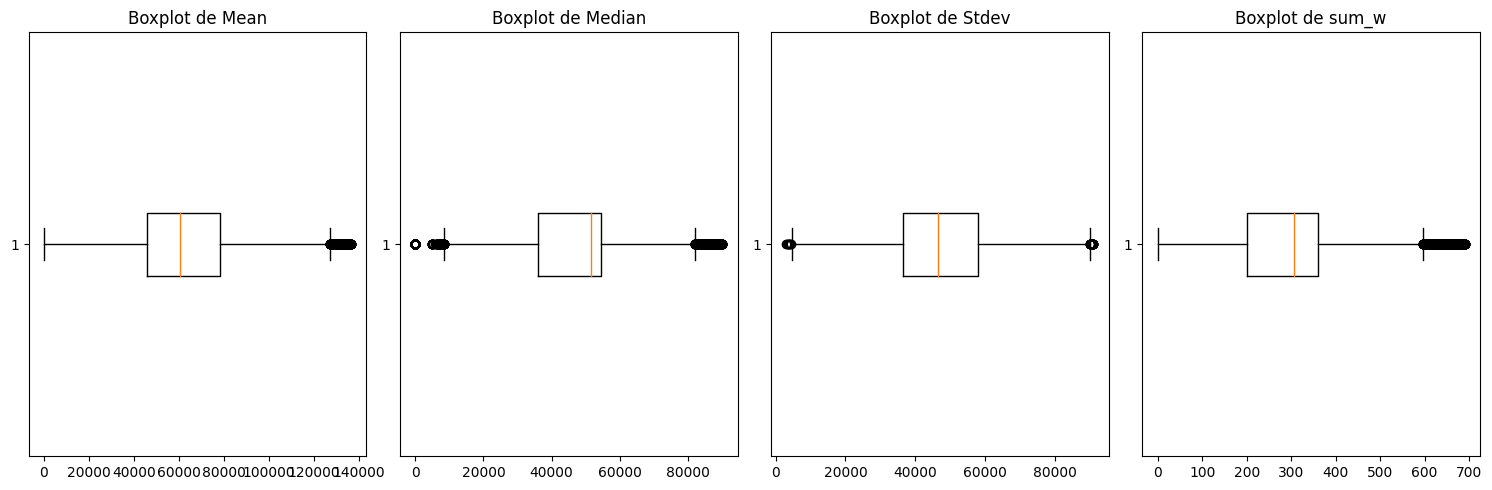

In [275]:
# Define las columnas que deseas analizar
columnas = ["Mean", "Median", 'Stdev', "sum_w"]

# Configura subgráficos para mostrar los boxplots
fig, axes = plt.subplots(1, len(columnas), figsize=(15, 5))

# Listas para almacenar los umbrales recomendados
umbrales_recomendados = []

for i, columna in enumerate(columnas):
    # Boxplot
    ax = axes[i]
    ax.boxplot(df_kaggle[columna], vert=False)
    ax.set_title(f'Boxplot de {columna}')

    # Cálculo del IQR y umbral recomendado
    Q1 = df_kaggle[columna].quantile(0.25)
    Q3 = df_kaggle[columna].quantile(0.75)
    IQR = Q3 - Q1

    umbral_recomendado = 2 * IQR
    umbrales_recomendados.append((columna, umbral_recomendado))

    # Identificación de outliers
    outliers = (df_kaggle[columna] < (Q1 - umbral_recomendado)) | (df_kaggle[columna] > (Q3 + umbral_recomendado))
    cantidad_outliers = outliers.sum()
    print(f"Cantidad de outliers en la columna '{columna}': {cantidad_outliers}")

plt.tight_layout()
plt.show()

In [276]:
df_kaggle

,id,State_Code,State_Name,State_ab,County,City,Place,Type,Primary,Zip_Code,Area_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,sum_w
0,1011000,1,Alabama,AL,Mobile County,Chickasaw,Chickasaw city,City,place,36611,251,10894952,909156,30.771450,-88.079697,38773.0,30506.0,33101.000000,306.375168
1,1011010,1,Alabama,AL,Barbour County,Louisville,Clio city,City,place,36048,334,26070325,23254,31.708516,-85.611039,37725.0,19528.0,43789.000000,258.017685
2,1011020,1,Alabama,AL,Shelby County,Columbiana,Columbiana city,City,place,35051,205,44835274,261034,33.191452,-86.615618,54606.0,31930.0,57348.000000,306.375168
3,1011030,1,Alabama,AL,Mobile County,Satsuma,Creola city,City,place,36572,251,36878729,2374530,30.874343,-88.009442,63919.0,52814.0,47707.000000,378.114619
4,1011040,1,Alabama,AL,Mobile County,Dauphin Island,Dauphin Island,Town,place,36528,251,16204185,413605152,30.250913,-88.171268,77948.0,67225.0,54270.000000,282.320328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32521,720296,72,Puerto Rico,PR,Adjuntas Municipio,Guaynabo,Adjuntas,Track,Track,970,787,589417,1691,18.397925,-66.130633,30649.0,13729.0,37977.000000,306.375168
32522,7202966,72,Puerto Rico,PR,Adjuntas Municipio,Aguada,Adjuntas,Track,Track,602,787,1801613,795887,18.385424,-67.203310,15520.0,9923.0,15541.000000,238.813450
32523,7202976,72,Puerto Rico,PR,Adjuntas Municipio,Aguada,Adjuntas,Track,Track,602,787,11031227,0,18.356565,-67.180686,41933.0,34054.0,31539.000000,313.551070
32524,7202986,72,Puerto Rico,PR,Adjuntas Municipio,Aguada,Adjuntas,Track,Track,602,787,0,33597561,18.412041,-67.213413,0.0,0.0,47673.490235,0.000000


Se procede a eliminar las columnas que se consideran irrelevantes para el análisis de mercado que se llevará a cabo.

In [277]:
# Lista de nombres de columnas a eliminar
columnas_irrelevantes = ['State_Code','State_ab','County','Place','Type','Primary','ALand','AWater','Area_Code']

# Eliminar las columnas irrelevantes
df_kaggle = df_kaggle.drop(columns=columnas_irrelevantes)

### 1.5 Se crea una columna de total_income para conocer el total del PIB por código postal, a partir de las columnas 'sum_w' y 'Mean'.

In [278]:
df_kaggle['total_income'] = df_kaggle['sum_w'] * df_kaggle['Mean']

In [279]:
# Utiliza el método groupby para calcular los promedios por 'Zip_Code'.
averages_by_zip_code = df_kaggle.groupby('Zip_Code').agg({'Mean': 'mean', 'Median': 'mean', 'sum_w': 'mean', 'total_income': 'mean'})

# Realiza la fusión de los DataFrames utilizando el código Zip como índice.
df_kaggle = df_kaggle.set_index('Zip_Code')
df_kaggle.update(averages_by_zip_code)

# Resetea el índice para volver a tener la columna 'Zip_Code'.
df_kaggle.reset_index(inplace=True)

In [280]:
# Utiliza el método drop_duplicates para eliminar las filas duplicadas basadas en 'Zip_Code'.
df_kaggle = df_kaggle.drop_duplicates(subset='Zip_Code')

### 1.6 Clasificación de la columna "total_income" en rangos con el objetivo de analizar los datos y el Producto Interno Bruto (PIB) estimado por estados de EE. UU. Esto puede ayudarte a identificar patrones y tendencias en los datos. 

In [281]:
# Obtener el valor máximo y mínimo de la columna 'total_income'
max_income = df_kaggle['total_income'].max()
min_income = df_kaggle['total_income'].min()

# Calcular la diferencia
difference = max_income - min_income

# Definir los límites de los rangos
num_ranges = 5
range_size = difference / num_ranges
ranges = [min_income + i * range_size for i in range(num_ranges + 1)]

# Etiquetas para los rangos
labels = [f'Rango {i+1}' for i in range(num_ranges)]

# Aplicar los rangos a la columna 'total_income'
df_kaggle['income_range'] = pd.cut(df_kaggle['total_income'], bins=ranges, labels=labels)

In [282]:
df_kaggle

,Zip_Code,id,State_Name,City,Lat,Lon,Mean,Median,Stdev,sum_w,total_income,income_range
0,36611,1011000,Alabama,Chickasaw,30.771450,-88.079697,32555.000000,25311.000000,33101.0,369.178653,1.162810e+07,Rango 1
1,36048,1011010,Alabama,Louisville,31.708516,-85.611039,37332.000000,23582.000000,43789.0,282.196426,1.052545e+07,Rango 1
2,35051,1011020,Alabama,Columbiana,33.191452,-86.615618,54606.000000,31930.000000,57348.0,306.375168,1.672992e+07,Rango 2
3,36572,1011030,Alabama,Satsuma,30.874343,-88.009442,61743.000000,52544.500000,47707.0,342.244894,2.120928e+07,Rango 2
4,36528,1011040,Alabama,Dauphin Island,30.250913,-88.171268,77948.000000,67225.000000,54270.0,282.320328,2.200630e+07,Rango 2
...,...,...,...,...,...,...,...,...,...,...,...,...
32459,726,7202406,Puerto Rico,Caguas,18.245952,-65.999500,69133.000000,56122.000000,57398.0,306.375168,2.118063e+07,Rango 2
32471,606,7202516,Puerto Rico,Maricao,18.192187,-66.980897,19194.000000,15233.000000,15261.0,558.299922,1.071601e+07,Rango 1
32481,601,72026,Puerto Rico,Adjuntas,18.155582,-66.701046,22496.333333,13144.333333,29483.0,482.003406,1.077000e+07,Rango 1
32482,733,7202606,Puerto Rico,Ponce,18.003187,-66.637715,28457.000000,19292.000000,26127.0,306.375168,8.718518e+06,Rango 1


In [283]:
# Suponiendo que df_kaggle es tu DataFrame
df_kaggle.to_csv('df_kaggle.csv', index=False)